In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.preprocessing import RobustScaler,StandardScaler
from sklearn.model_selection import train_test_split,learning_curve
import seaborn as sns
from sklearn.metrics import classification_report
%matplotlib inline
sns.set()
import warnings
warnings.filterwarnings('ignore')

In [7]:
df = pd.read_csv('dataset.csv', index_col='Date', parse_dates=True)

In [8]:
df.head()

,Open,High,Low,Close,Adj Close,Volume,SP_open,SP_high,SP_low,SP_close,...,GDX_Low,GDX_Close,GDX_Adj Close,GDX_Volume,USO_Open,USO_High,USO_Low,USO_Close,USO_Adj Close,USO_Volume
Date,,,,,,,,,,,,,,,,,,,,,
2011-12-15,154.740005,154.949997,151.710007,152.330002,152.330002,21521900,123.029999,123.199997,121.989998,122.180000,...,51.570000,51.680000,48.973877,20605600,36.900002,36.939999,36.049999,36.130001,36.130001,12616700
2011-12-16,154.309998,155.369995,153.899994,155.229996,155.229996,18124300,122.230003,122.949997,121.300003,121.589996,...,52.040001,52.680000,49.921513,16285400,36.180000,36.500000,35.730000,36.270000,36.270000,12578800
2011-12-19,155.479996,155.860001,154.360001,154.869995,154.869995,12547200,122.059998,122.320000,120.029999,120.290001,...,51.029999,51.169998,48.490578,15120200,36.389999,36.450001,35.930000,36.200001,36.200001,7418200
2011-12-20,156.820007,157.429993,156.580002,156.979996,156.979996,9136300,122.180000,124.139999,120.370003,123.930000,...,52.369999,52.990002,50.215282,11644900,37.299999,37.610001,37.220001,37.560001,37.560001,10041600
2011-12-21,156.979996,157.529999,156.130005,157.160004,157.160004,11996100,123.930000,124.360001,122.750000,124.169998,...,52.419998,52.959999,50.186852,8724300,37.669998,38.240002,37.520000,38.110001,38.110001,10728000


### Preprocessing

* Vérification des données manquante

In [9]:
# Fonction de Vérification des données manquantes
def check_missing_value(df):
    return df.isnull().values.any()

In [10]:
#def check_outliers(df):
    #return df.boxplot(figsize=(15,5))

In [11]:
check_missing_value(df)

False

* Vérification des types de données 

In [12]:
df.dtypes

Open             float64
High             float64
Low              float64
Close            float64
Adj Close        float64
                  ...   
USO_High         float64
USO_Low          float64
USO_Close        float64
USO_Adj Close    float64
USO_Volume         int64
Length: 80, dtype: object

* Vérification des valeurs Aberrantes

In [13]:
#Fonction de recherche des valeurs aberrantes
def valeurAberante(data):
    percentage = {}
    for col in data:
        Q1 = np.quantile(data[col],0.25)
        Q3 = np.quantile(data[col],0.75)
        IIQ = Q3 - Q1
        bornInf = Q1-1.5*IIQ
        bornSup = Q3+1.5*IIQ
        abberantVal = []
        for i in df[col]:
            if bornInf <= i <= bornSup :
                pass
            else:
                abberantVal.append(i)
                percent = len(abberantVal)*100/1718
                percentage[col] = percent
    return percentage

In [14]:
ab_dict = valeurAberante(df)

In [15]:
df_ab = pd.DataFrame([ab_dict])

In [16]:
df_ab

,Open,High,Low,Close,Adj Close,Volume,SP_volume,DJ_volume,EG_open,EG_high,...,PLD_Low,RHO_PRICE,USDI_Volume,GDX_Open,GDX_High,GDX_Low,GDX_Close,GDX_Adj Close,GDX_Volume,USO_Volume
0,18.975553,18.975553,18.917346,18.917346,18.917346,3.783469,2.444703,1.45518,4.307334,4.249127,...,1.513388,16.821886,4.481956,17.57858,17.694994,18.218859,17.811409,17.811409,3.725262,2.677532


## Création du modèle sans les données aberrantes

In [19]:
y = df['Adj Close']
X = df.drop(df_ab.columns, axis=1)

In [20]:
y.shape

(1718,)

* Normalisation des données

In [23]:
std_normalizer = StandardScaler()
std_normalizer.fit(X)
X[X.columns] = std_normalizer.transform(X)

In [24]:
X

,SP_open,SP_high,SP_low,SP_close,SP_Ajclose,DJ_open,DJ_high,DJ_low,DJ_close,DJ_Ajclose,...,USDI_Price,USDI_Open,USDI_High,USDI_Low,USDI_Trend,USO_Open,USO_High,USO_Low,USO_Close,USO_Adj Close
Date,,,,,,,,,,,,,,,,,,,,,
2011-12-15,-1.859004,-1.869181,-1.868930,-1.880786,-1.788933,-1.629320,-1.607299,-1.615966,-1.621096,-1.621096,...,-1.260117,-1.229011,-1.251568,-1.257772,-1.025948,1.293922,1.275157,1.244018,1.226738,1.226738
2011-12-16,-1.877261,-1.874868,-1.884753,-1.894268,-1.785710,-1.617758,-1.607212,-1.617494,-1.621720,-1.621720,...,-1.272361,-1.280883,-1.282630,-1.283922,-1.025948,1.230917,1.236814,1.215876,1.238987,1.238987
2011-12-19,-1.881141,-1.889198,-1.913878,-1.923972,-1.808989,-1.618712,-1.618045,-1.639248,-1.647504,-1.647504,...,-1.277950,-1.264257,-1.272717,-1.258443,-1.025948,1.249293,1.232457,1.233465,1.232862,1.232862
2011-12-20,-1.878402,-1.847799,-1.906081,-1.840800,-1.743809,-1.643741,-1.569068,-1.630548,-1.560641,-1.560641,...,-1.269167,-1.185785,-1.210594,-1.270512,0.974709,1.328924,1.333544,1.346915,1.351853,1.351853
2011-12-21,-1.838465,-1.842794,-1.851501,-1.835316,-1.739510,-1.557754,-1.568409,-1.570910,-1.559570,-1.559570,...,-1.258919,-1.290193,-1.276021,-1.335550,0.974709,1.361301,1.388444,1.373298,1.399974,1.399974
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018-12-24,0.788467,0.806776,0.705931,0.682035,0.868771,1.068807,1.048877,0.961591,0.934262,0.934262,...,0.824811,0.882419,0.838128,0.852968,-1.025948,-1.104630,-1.114316,-1.110281,-1.121580,-1.121580
2018-12-26,0.718407,0.928245,0.694235,0.952576,1.112894,0.950629,1.186923,0.940987,1.213981,1.213981,...,0.899473,0.837198,0.865885,0.873084,0.974709,-1.125632,-1.079459,-1.114678,-1.068209,-1.068209
2018-12-27,0.869026,0.976241,0.813484,0.995762,1.151864,1.148985,1.253499,1.084487,1.281028,1.281028,...,0.824013,0.885080,0.845398,0.861685,-1.025948,-1.095880,-1.102988,-1.102366,-1.092707,-1.092707


* Division du Dataset en Train et Test

In [25]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=.3,random_state=5)

In [26]:
X_test.shape

(516, 47)

* Modèlisation avec l'Algorithme de Regression linèaire.

In [27]:
model = LinearRegression()

In [28]:
model.fit(X_train, y_train)

LinearRegression()

In [30]:
train_score = model.score(X_train,y_train)
test_score = model.score(X_test, y_test)
print(f'Le score à l\'entrenement est:{train_score}')
print(f'Le score du modèle sur le jeu de test {test_score}')

Le score à l'entrenement est:0.9726821328699942
Le score du modèle sur le jeu de test 0.9661674658245912


* Tracer du Graphe des prédictions et des valeurs réels 

In [31]:
y_pred = model.predict(X_test)

In [32]:
y_pred =list(y_pred)

In [41]:
predict_df = pd.DataFrame(y_pred,index=y_test.index,columns=['Prediction'])
test = pd.DataFrame(y_test)

In [43]:
predicts = pd.concat([test,predict_df],axis=1)

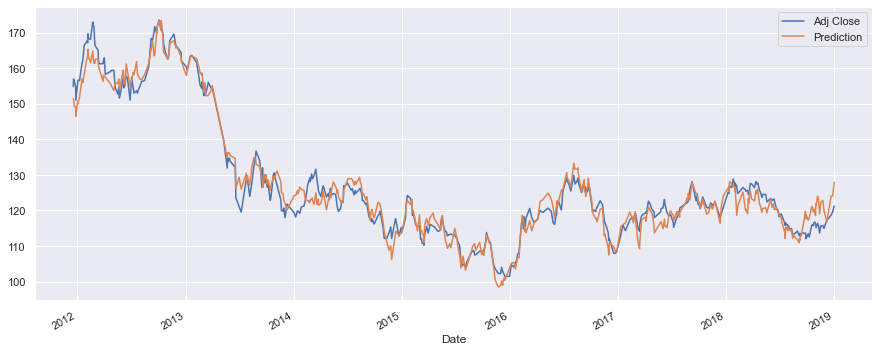

In [46]:
plt.figure(figsize=(15,6))
predicts['Adj Close'].plot()
predicts['Prediction'].plot()
plt.legend()
plt.show()

* Tracer de la courbe d'apprentissage

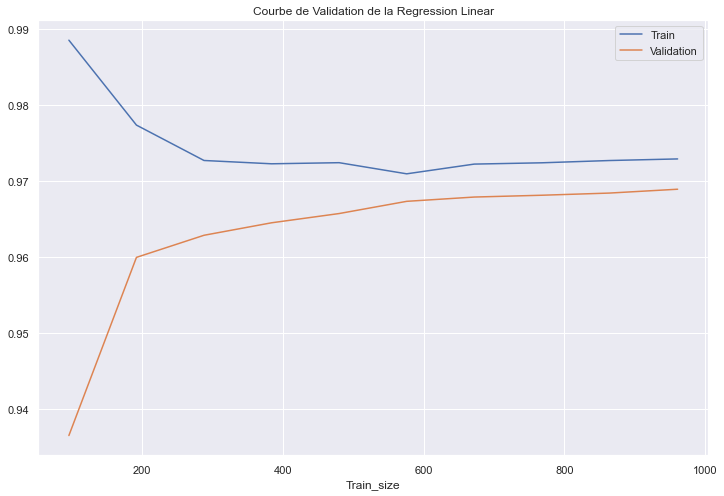

In [47]:
var, train_score, val_score = learning_curve(model,X_train, y_train, train_sizes=np.linspace(0.1,1.0,10), cv=5)
plt.figure(figsize=(12,8))
plt.title('Courbe de Validation de la Regression Linear')
plt.plot(var, train_score.mean(axis = 1), label = 'Train')
plt.plot(var, val_score.mean(axis = 1), label = 'Validation')
plt.xlabel('Train_size')
plt.legend()
plt.show()

* Création du model avec l'algorithme de GradientBoostingRegressor

In [48]:
G_model = GradientBoostingRegressor()

In [49]:
G_model.fit(X_test,y_test)

GradientBoostingRegressor()

In [55]:
train_score = G_model.score(X_train,y_train)
test_score = G_model.score(X_test, y_test)
print(f'Le score à l\'entrainement avec le DradientboostRegressor est :{train_score}')
print(f'Le Score sur les données de test avec le DradientboostRegressor est :{test_score}')

Le score à l'entrainement avec le DradientboostRegressor est :0.9824596942066385
Le Score sur les données de test avec le DradientboostRegressor est :0.9960958980756697


* Tracer du Graphe des prédictions et des valeurs réels 

In [51]:
y_pred = G_model.predict(X_test)

In [52]:
predict_df = pd.DataFrame(y_pred,index=y_test.index,columns=['Prediction'])
test = pd.DataFrame(y_test)

In [53]:
predicts = pd.concat([test,predict_df],axis=1)

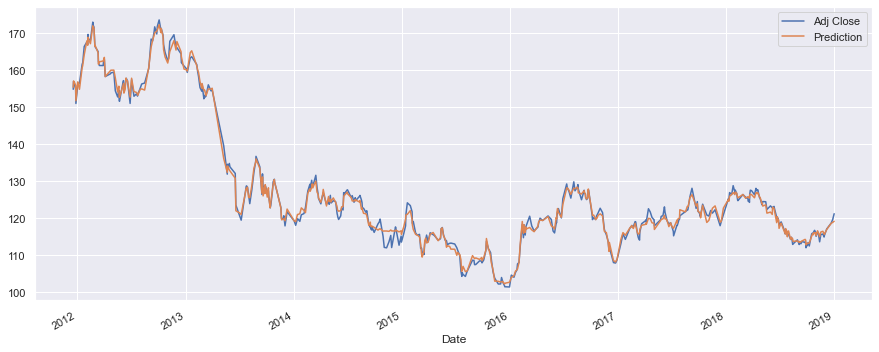

In [54]:
plt.figure(figsize=(15,6))
predicts['Adj Close'].plot()
predicts['Prediction'].plot()
plt.legend()
plt.show()

* Tracer de learning du DradientboostRegressor

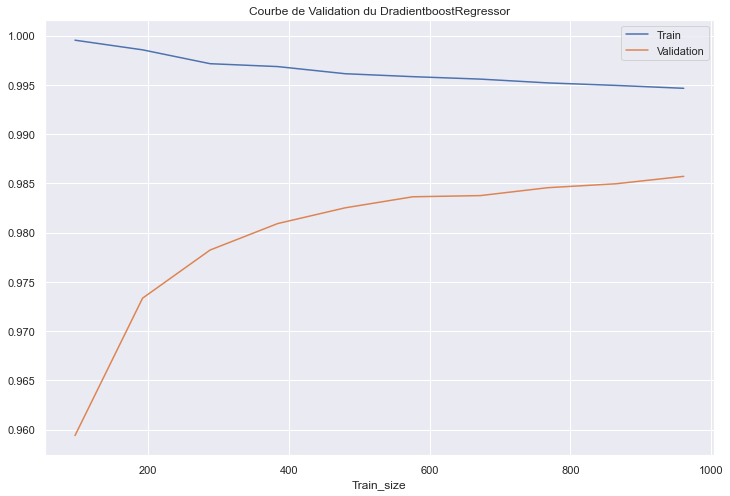

In [56]:
var, train_score, val_score = learning_curve(G_model,X_train, y_train, train_sizes=np.linspace(0.1,1.0,10), cv=5)
plt.figure(figsize=(12,8))
plt.title('Courbe de Validation du DradientboostRegressor')
plt.plot(var, train_score.mean(axis = 1), label = 'Train')
plt.plot(var, val_score.mean(axis = 1), label = 'Validation')
plt.xlabel('Train_size')
plt.legend()
plt.show()

# Creation du modèle avec les valeurs Aberrantes

In [59]:
Yo = df['Adj Close']
Xo = df.drop('Adj Close', axis=1)

In [60]:
rbs_normalizer = RobustScaler()
rbs_normalizer.fit(Xo)
Xo[Xo.columns] = rbs_normalizer.transform(Xo)

In [61]:
Xo

,Open,High,Low,Close,Volume,SP_open,SP_high,SP_low,SP_close,SP_Ajclose,...,GDX_Low,GDX_Close,GDX_Adj Close,GDX_Volume,USO_Open,USO_High,USO_Low,USO_Close,USO_Adj Close,USO_Volume
Date,,,,,,,,,,,,,,,,,,,,,
2011-12-15,2.688923,2.600120,2.507438,2.459030,2.927618,-1.232212,-1.247154,-1.238396,-1.253525,-1.139031,...,4.454793,4.251764,4.175865,-0.485849,0.889131,0.876443,0.877247,0.859283,0.859283,-0.171436
2011-12-16,2.653698,2.633593,2.688429,2.692571,2.219050,-1.244170,-1.250899,-1.248761,-1.262398,-1.136966,...,4.527746,4.400297,4.326350,-0.611542,0.857826,0.857451,0.863218,0.865364,0.865364,-0.173285
2011-12-19,2.749540,2.672645,2.726446,2.663579,1.055949,-1.246711,-1.260336,-1.267838,-1.281949,-1.151881,...,4.370974,4.176012,4.099116,-0.645443,0.866957,0.855293,0.871986,0.862324,0.862324,-0.425092
2011-12-20,2.859310,2.797769,2.909917,2.833501,0.344607,-1.244918,-1.233074,-1.262731,-1.227206,-1.110117,...,4.578968,4.446343,4.373001,-0.746555,0.906522,0.905363,0.928540,0.921390,0.921390,-0.297086
2011-12-21,2.872416,2.805739,2.872727,2.847997,0.941017,-1.218759,-1.229778,-1.226979,-1.223597,-1.107363,...,4.586729,4.441887,4.368486,-0.831528,0.922609,0.932557,0.941692,0.945277,0.945277,-0.263593
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018-12-24,-0.192095,-0.174138,-0.148760,-0.142944,0.469758,0.501868,0.514979,0.448250,0.433282,0.563876,...,-0.344587,-0.291868,-0.252112,0.675058,-0.302609,-0.307111,-0.296361,-0.306406,-0.306406,0.266809
2018-12-26,-0.106082,-0.105599,-0.148760,-0.171935,1.420139,0.455979,0.594967,0.440589,0.611347,0.720296,...,-0.363213,-0.361678,-0.326749,1.136443,-0.313044,-0.289846,-0.298553,-0.279913,-0.279913,1.212469
2018-12-27,-0.110178,-0.113568,-0.101653,-0.098651,0.915637,0.554634,0.626573,0.518702,0.639772,0.745265,...,-0.336826,-0.309692,-0.271169,0.438986,-0.298261,-0.301500,-0.292416,-0.292074,-0.292074,0.997770


In [62]:
Xo_train,Xo_test,Yo_train,Yo_test = train_test_split(Xo,Yo,train_size=.3,random_state=5)

* Modèle de Regression Linéaire

In [63]:
model.fit(Xo_train,Yo_train)

LinearRegression()

In [66]:
train_score = model.score(Xo_train,Yo_train)
test_score = model.score(Xo_test, Yo_test)
print(f'Le score à l\'entrenement est:{train_score}')
print(f'Le score du modèle sur le jeu de test {test_score}')

Le score à l'entrenement est:1.0
Le score du modèle sur le jeu de test 1.0


* Modèle DradientboostRegressor

In [68]:
G_model.fit(Xo_train,Yo_train)

GradientBoostingRegressor()

In [69]:
train_score_o = G_model.score(Xo_train,Yo_train)
test_score_o = G_model.score(Xo_test, Yo_test)
print(f'Train Score {train_score_o}')
print(f'Test Score {test_score_o}')

Train Score 0.9999826809419722
Test Score 0.9995685721939789


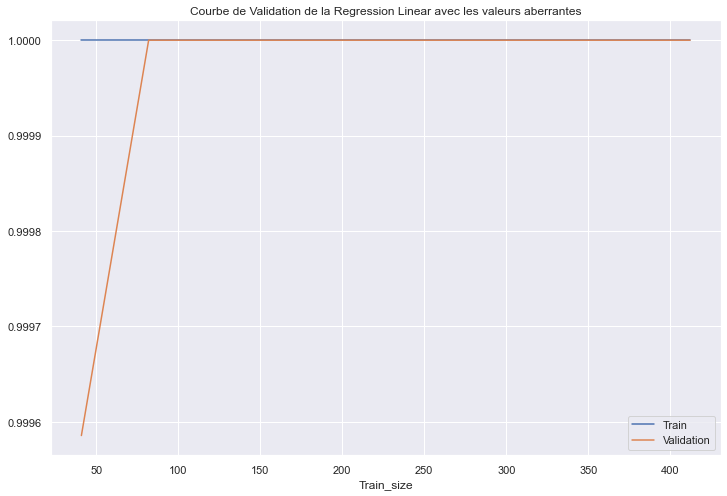

In [70]:
var, train_score, val_score = learning_curve(model,Xo_train, Yo_train, train_sizes=np.linspace(0.1,1.0,10), cv=5)
plt.figure(figsize=(12,8))
plt.title('Courbe de Validation de la Regression Linear avec les valeurs aberrantes')
plt.plot(var, train_score.mean(axis = 1), label = 'Train')
plt.plot(var, val_score.mean(axis = 1), label = 'Validation')
plt.xlabel('Train_size')
plt.legend()
plt.show()